# regrestion Lineaire

In [64]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset

In [65]:
x,y = make_regression(n_samples=100,n_features=2,noise=10)


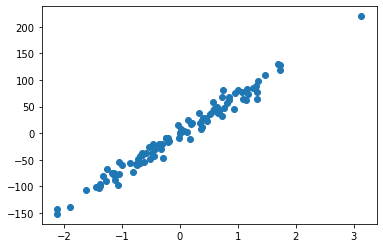

In [78]:
plt.scatter(x[:,1],y)

In [69]:
print(x.shape)
#### y = y + abs(y/2)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100, 1)


In [72]:
#matrice x
X = np.hstack((x,np.ones((x.shape[0],1))))
# ###########
####X = np.hstack((x**2, X))
X[:5]

array([[-0.89370912,  1.31964059,  1.        ],
       [ 0.84128602, -0.42294242,  1.        ],
       [ 0.42507224,  1.09736925,  1.        ],
       [-2.17078138, -2.11870597,  1.        ],
       [ 0.23148419, -1.44212473,  1.        ]])

In [73]:
theta  = np.random.randn(3,1)
theta

array([[ 1.1061835 ],
       [ 1.03844295],
       [-0.34778549]])

# 2. Modele 

In [74]:
def model(X, theta):
    return X.dot(theta)

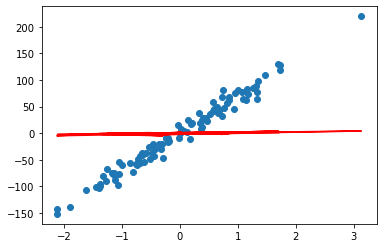

In [77]:
plt.scatter(x[:,1],y)
plt.plot(x[:,1], model(X, theta),c='r')

# 3. Fonction cout

In [79]:
def cout_fonction(X, y, theta):
    m = len(y)
    return 1/(2*m)*np.sum(model(X, theta)-y)**2

In [80]:
cout_fonction(X, y, theta)

156.26529775203772

# Gradients Descente de Gratient

In [81]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) -y)

In [82]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cos_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cos_history[i] = cout_fonction(X, y, theta)
    return theta, cos_history

# 5.  Entrainement du model
    Machine Learning

In [83]:
theta_final,cost_history = gradient_descent(X, y,theta, learning_rate=0.01, n_iterations=1000)

In [84]:
theta_final

array([[ 4.38498232],
       [69.02564511],
       [-0.14070255]])

<IPython.core.display.Javascript object>


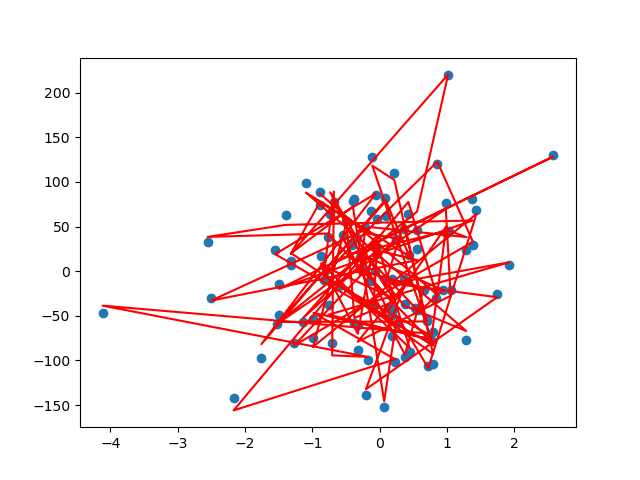

In [93]:
predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.plot(x[:,0], predictions, c='r')

# Coubre d'apprentissage

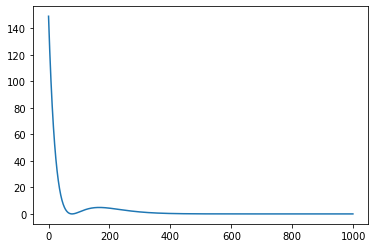

In [88]:
plt.plot(range(1000), cost_history)

## 7. Coefficient de Determination
    Performance du modele
    

In [89]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [90]:
coef_determination(y, predictions)

0.9811458550838218

# Representation 3D

<IPython.core.display.Javascript object>


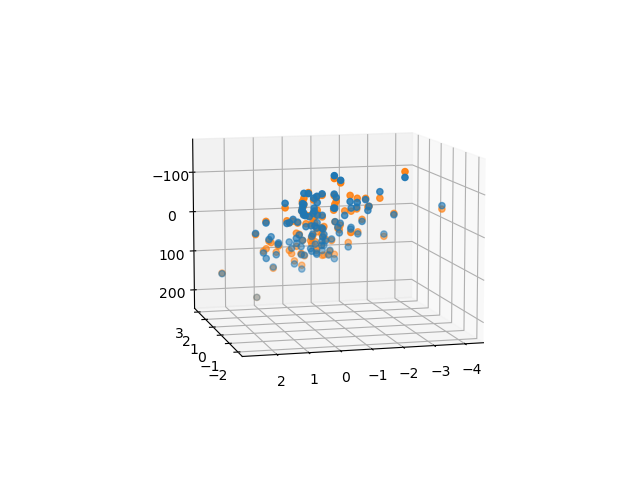

In [94]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)